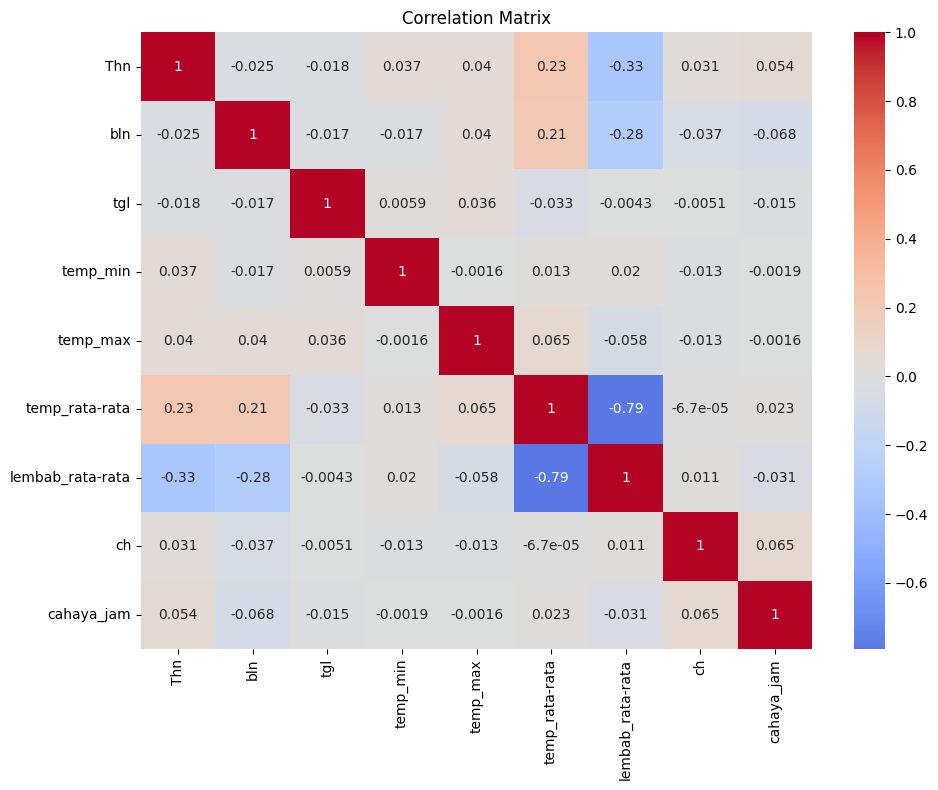

Basic Statistics:
              Thn         bln         tgl     temp_min     temp_max  \
count   719.00000  719.000000  719.000000   719.000000   719.000000   
mean   2022.49235    6.442281   15.563282    37.401950    46.165734   
std       0.50029    3.408852    8.767571   372.025152   371.701376   
min    2022.00000    1.000000    1.000000    18.200000    20.000000   
25%    2022.00000    3.500000    8.000000    23.200000    31.200000   
50%    2022.00000    6.000000   15.000000    23.800000    32.400000   
75%    2023.00000    9.000000   23.000000    24.400000    33.400000   
max    2023.00000   12.000000   31.000000  9999.000000  9999.000000   

       temp_rata-rata  lembab_rata-rata           ch   cahaya_jam  
count      719.000000        719.000000   719.000000   719.000000  
mean        27.206285         83.681564   998.574441    32.383821  
std          1.456032          6.622469  2794.217813   526.759980  
min         23.700000         57.000000     0.000000     0.000000  
25

In [7]:
# Import additional libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 


# Load and preprocess the data
data = pd.read_csv('data_cuaca.csv', sep=';')
data.fillna(data.mean(), inplace=True)

# Create correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Print basic statistics
print("\
Basic Statistics:")
print(data.describe())

Model Performance Metrics:
Mean Squared Error: 0.3986189957638126
R-squared Score: 0.8382840595844179
Cross-validation scores:
R-squared scores for each fold: [0.63141098 0.66070983 0.3332007  0.78167989 0.80339731]
Average R-squared score: 0.6420797415633266


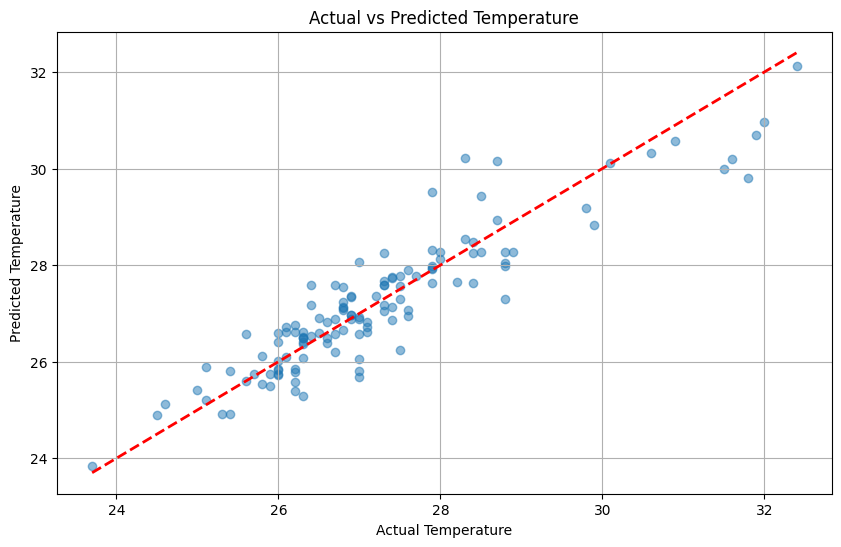

Feature Importance:
            Feature  Coefficient
0          temp_min     0.728555
1          temp_max     0.281970
3                ch     0.100117
4        cahaya_jam     0.003854
2  lembab_rata-rata    -1.169501


In [8]:
# Clean outliers and prepare data
data = pd.read_csv('data_cuaca.csv', sep=';')

# Remove extreme outliers
data = data[data['temp_min'] < 100]  # Remove unrealistic temperature values
data = data[data['temp_max'] < 100]
data = data[data['ch'] < 1000]       # Remove unrealistic rainfall values
data = data[data['cahaya_jam'] < 24] # Remove unrealistic sunshine hours

# Fill missing values with median (more robust to outliers than mean)
data = data.fillna(data.median())

# Feature selection based on correlation with target
X = data[['temp_min', 'temp_max', 'lembab_rata-rata', 'ch', 'cahaya_jam']]
y = data['temp_rata-rata']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("\
Cross-validation scores:")
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
print("Average R-squared score:", cv_scores.mean())

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\
Feature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))